<center>
    <h1><b> Find Optimal Model & Hyperparameters</b></h1>
</center>

For digits dataset in sklern.dataset, please find out the model that gives best performane. Also find the optimal parameters for that clasifier

In [1]:
# Importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle as pk
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
# Loading dataset
digits = datasets.load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# Converting data to dataframe
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df[10:14]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
10,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0
12,0.0,0.0,5.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8.0,2.0,0.0,0.0,3.0,11.0,8.0,13.0,12.0,4.0
13,0.0,2.0,9.0,15.0,14.0,9.0,3.0,0.0,0.0,4.0,...,6.0,0.0,0.0,2.0,12.0,12.0,13.0,11.0,0.0,0.0


In [5]:
# Adding target column to the dataframe

df['target'] = digits.target
df.sample(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1401,0.0,0.0,8.0,15.0,14.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,11.0,1.0,0.0,0.0,8
1139,0.0,0.0,8.0,16.0,14.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,6.0,0.0,0.0,0.0,0.0,7


In [6]:
df.shape

(1797, 65)

In [7]:
df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'target', axis = 1),
                                                   df['target'], test_size = 0.2, random_state = 0)

In [9]:
X_train[0:2]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1109,0.0,0.0,0.0,9.0,15.0,2.0,0.0,0.0,0.0,0.0,...,15.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,6.0
940,0.0,3.0,12.0,12.0,14.0,4.0,0.0,0.0,0.0,1.0,...,8.0,0.0,0.0,2.0,13.0,16.0,16.0,16.0,2.0,0.0


In [10]:
X_train.shape

(1437, 64)

In [11]:
X_test.shape

(360, 64)

### Building Multiple models

In [12]:
# Building model and slection of parameters
model_params = {
        'svm': {
        'model': svm.SVC(gamma = 'scale'),
        'params': {
            'C': [1, 5, 10, 15, 20],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
    'params': {
        'n_estimators': [1, 5, 10, 15, 20]
    }
    },
    
    'logistic_regression': {
        'model': LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params': {
            'C': [1, 5, 10, 15, 20],
            'penalty': ['l1', 'l2']
        }
    },
    'Gaussian_NB': {
        'model': GaussianNB(),
    'params': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }
},
    'Multinomial_NB': {
        'model': MultinomialNB(force_alpha = True),
        'params': {
            'alpha': [1.0, 0.5, 0.1]
        }
    }
}

In [13]:
scores = []

for model_name, model_par in model_params.items():
    clf = GridSearchCV(model_par['model'], model_par['params'], return_train_score = False, cv = 5)
    clf.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = clf.predict(X_test)

    # Storing the results
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [14]:
scores

[{'model': 'svm',
  'best_score': 0.9930410375532327,
  'best_params': {'C': 5, 'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': 0.9624298296554394,
  'best_params': {'n_estimators': 20}},
 {'model': 'logistic_regression',
  'best_score': 0.9603319783197831,
  'best_params': {'C': 1, 'penalty': 'l1'}},
 {'model': 'Gaussian_NB',
  'best_score': 0.8747314169570266,
  'best_params': {'var_smoothing': 1e-07}},
 {'model': 'Multinomial_NB',
  'best_score': 0.9004960317460318,
  'best_params': {'alpha': 1.0}}]

In [15]:
# Putting the score values in a dataframe
df1 = pd.DataFrame(scores)

# Calculating the percentage of the best scores
df1['best_score_%'] = (df1['best_score'] * 100).round(2)
df1

,model,best_score,best_params,best_score_%
0,svm,0.993041,"{'C': 5, 'kernel': 'rbf'}",99.30
1,random_forest,0.962430,{'n_estimators': 20},96.24
2,logistic_regression,0.960332,"{'C': 1, 'penalty': 'l1'}",96.03
3,Gaussian_NB,0.874731,{'var_smoothing': 1e-07},87.47
4,Multinomial_NB,0.900496,{'alpha': 1.0},90.05


### Selecting the best model

In [16]:
best_model = None
best_score = 0

for model_name, model_par in model_params.items():
    clf = GridSearchCV(model_par['model'], model_par['params'], return_train_score = False, cv = 5)
    clf.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = clf.predict(X_test)

    # Storing the results
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Trackng the best model across all iterations
    if clf.best_score_ > best_score:
        best_score = clf.best_score_
        best_model = clf.best_estimator_

print(f'The best model overall is: {best_model}')

The best model overall is: SVC(C=5)


## Confusion Matrix

In [17]:
# Calculating confusion matrix for the best model

best_model = best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

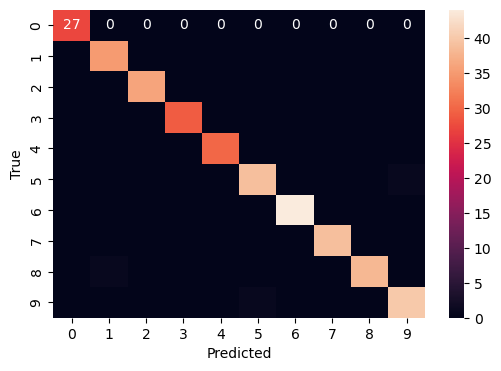

In [18]:
# Visualizing the confusion matrix
plt.figure(figsize =[6, 4])
sb.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel('True');

# Saving the Best Model

In [19]:
# Saving the model as a pickle file
with open('model_optimal_hyperparameter.pkl', 'wb') as f:
    pk.dump(best_model, f)